## Implementing TD Learning

In [1]:
pip install pygame-minesweeper

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pygame-minesweeper-core

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from minesweeper import core
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

from tdagent_test import TDLearning


# Hyperparameters TD Learning

In [2]:
env = core.Board(rows=10, cols=10, mines=30)

alpha_vals = [0.1, 0.2, 0.3]
gamma_vals = [0.99, 0.95, 0.97]
epsilon_vals = [0.1, 0.2]

rewards = []
best_params = []

for a in alpha_vals:
    for g in gamma_vals:
        for ep in epsilon_vals:  
            num_eps = 1000
            td_agent = TDLearning(env, a, g, ep, num_eps)  
            
            
            td_agent.train()

            avg_r = sum(td_agent.rewards_per_ep) / num_eps
            rewards.append(avg_r)
            best_params.append((a, g, ep))

Training Progress: 100%|██████████| 1000/1000 [00:02<00:00, 499.78it/s]


In [3]:
# Find best parameters
best_idx = np.argmax(rewards)  # Get index of max reward
best_p = best_params[best_idx]
print(f"Best hyperparameters: {best_p} with avg reward: {max(rewards)}")

Best hyperparameters: (0.3, 0.97, 0.1) with avg reward: 30.085


In [5]:
from minesweeper import core
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

from tdagent_test import TDLearning

env = core.Board(rows=10, cols=10, mines=30)
alpha = 0.3
gamma = 0.97
ep = 0.1

num_eps = 1000
td_agent = TDLearning(env, alpha, gamma, ep, num_eps)


td_agent.train()

Training Progress: 100%|██████████| 1000/1000 [00:04<00:00, 241.77it/s]


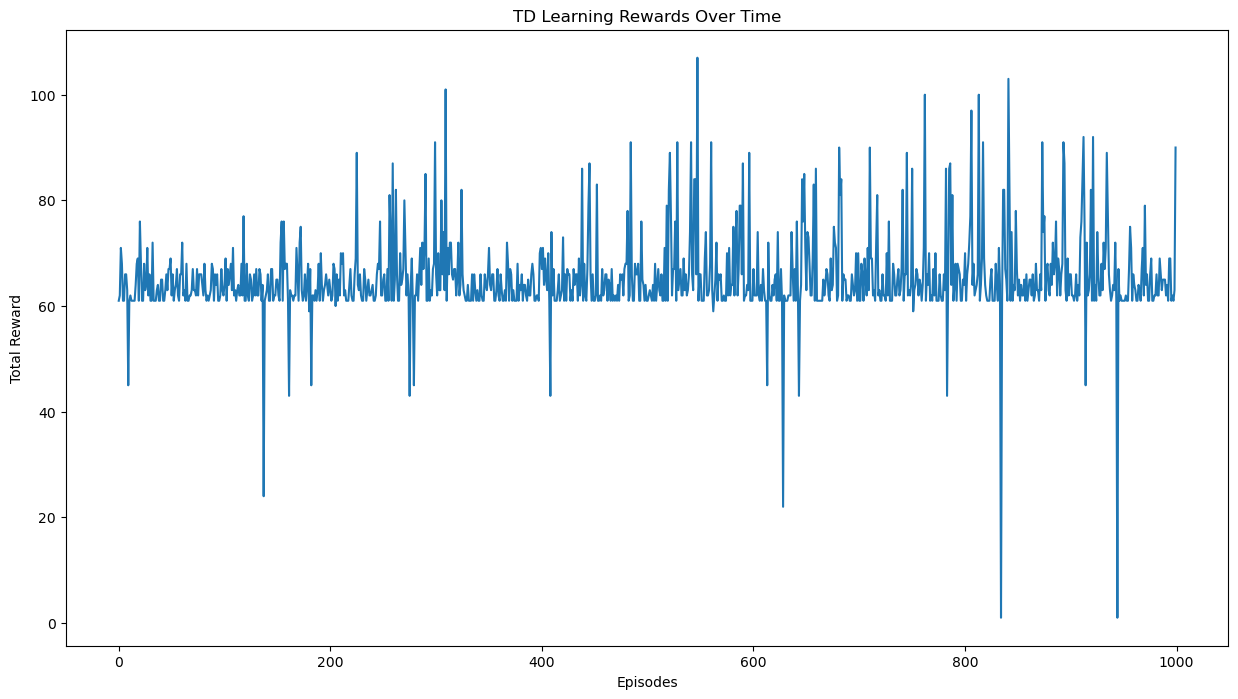

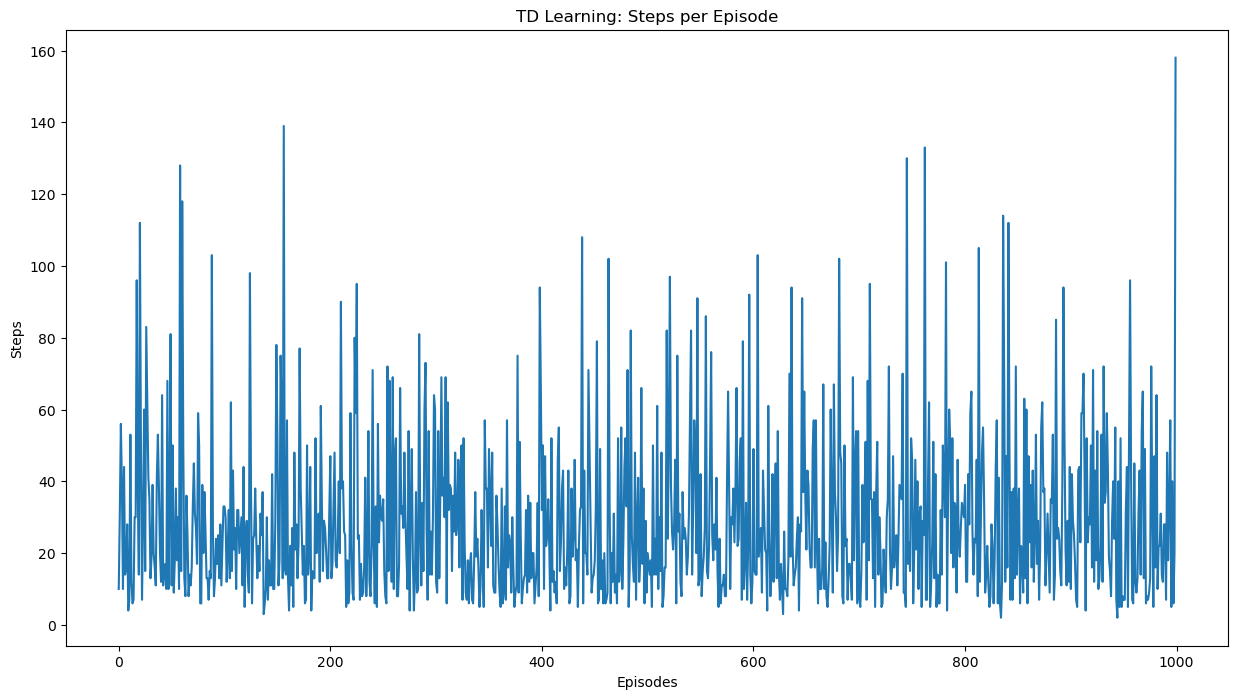

TD Learning Agent
Win rate:  0.0
Avg Steps:  28.98
Avg rewards:  65.367


In [6]:
td_agent.plot_rewards()